<a href="https://colab.research.google.com/github/Karthikard/DL/blob/main/Handwritten_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train,y_train) , (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_train.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
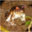

In [8]:
X_train[0]

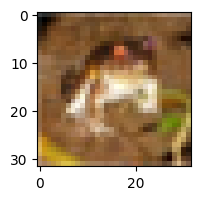

In [9]:
plt.figure(figsize=(10,2))
plt.imshow(X_train[0])

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
y_train = y_train.reshape(-1,)  #no changes needed thn -1
y_train[:5]            #2dimension converted to 1 dimension

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
classes[0]

'airplane'

In [15]:
def plot_sample(X,y,index):
  plt.figure(figsize=(10,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

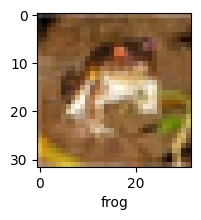

In [16]:
plot_sample(X_train,y_train,0)

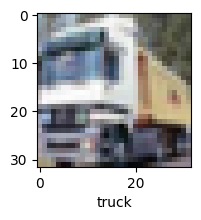

In [17]:
plot_sample(X_train,y_train,1)

Normalize the img

In [18]:
X_train = X_train / 255

In [19]:
X_train[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

In [20]:
X_test = X_test / 255

ANN model

In [23]:
X_train.shape

(50000, 32, 32, 3)

In [25]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.3037 - loss: 1.9320
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 77ms/step - accuracy: 0.4205 - loss: 1.6444
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.4547 - loss: 1.5532
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 77ms/step - accuracy: 0.4783 - loss: 1.4902
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.4919 - loss: 1.4428


In [26]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.4697 - loss: 1.5048


[1.5101161003112793, 0.46299999952316284]

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.41      0.50      1000
           1       0.64      0.58      0.61      1000
           2       0.36      0.34      0.35      1000
           3       0.35      0.38      0.36      1000
           4       0.46      0.29      0.35      1000
           5       0.49      0.23      0.31      1000
           6       0.34      0.82      0.48      1000
           7       0.80      0.27      0.40      1000
           8       0.50      0.75      0.60      1000
           9       0.53      0.58      0.55      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



CNN

In [29]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),


    #dense
    layers.Flatten(),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
cnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [32]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 68ms/step - accuracy: 0.5098 - loss: 1.3713
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 67ms/step - accuracy: 0.6684 - loss: 0.9486
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 66ms/step - accuracy: 0.7445 - loss: 0.7322
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 68ms/step - accuracy: 0.8110 - loss: 0.5487
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 67ms/step - accuracy: 0.8716 - loss: 0.3730
